# HYPERPARAMETER TUNING

## Classification

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report, plot_roc_curve, plot_precision_recall_curve

### Load Dataset

In [2]:
df_bank = pd.read_csv('bankloan.csv')
df_bank

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


### Data Splitting

In [3]:
X = df_bank[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = df_bank['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [4]:
X_test.shape

(140, 4)

### Model (without cross validation)

In [5]:
# define model
logreg = LogisticRegression()

# fitting
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

# metric (accuracy)
accuracy_score(y_test, y_pred)

0.8

In [22]:
# define model
knn = KNeighborsClassifier()

# fitting
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# metric (accuracy)
accuracy_score(y_test, y_pred)

0.7928571428571428

### Cross Validation

Untuk memilih algoritma terbaik

In [6]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [7]:
# define benchmark model

logreg = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(max_depth=3, random_state=10)

#### Accuracy

In [8]:
# define fold
skfold = StratifiedKFold(n_splits=5)

# melakukan cross validation (dilakukan pada train set)
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=skfold, scoring='accuracy')
knn_cv = cross_val_score(knn, X_train, y_train, cv=skfold, scoring='accuracy')
tree_cv = cross_val_score(tree, X_train, y_train, cv=skfold, scoring='accuracy')

print(logreg_cv, 'logreg')
print(knn_cv, 'knn')
print(tree_cv, 'tree')

[0.76785714 0.80357143 0.875      0.8125     0.77678571] logreg
[0.69642857 0.77678571 0.78571429 0.79464286 0.76785714] knn
[0.75       0.77678571 0.79464286 0.76785714 0.70535714] tree


In [9]:
# from sklearn.metrics import SCORERS
# SCORERS.keys()

In [10]:
# Rata-rata accuracy (pilih yang paling tinggi)

print(logreg_cv.mean(), 'logreg')
print(knn_cv.mean(), 'knn')
print(tree_cv.mean(), 'tree')

0.8071428571428572 logreg
0.7642857142857142 knn
0.7589285714285714 tree


In [11]:
# Standard Deviation(cari yang std paling kecil, artinya model paling stabil)

print(logreg_cv.std(), 'logreg')
print(knn_cv.std(), 'knn')
print(tree_cv.std(), 'tree')

0.037711985860612265 logreg
0.03508371911497947 knn
0.030409618510582836 tree


**Kesimpulan**

- Kita mencoba 3 benchmark model dengan algoritma berbeda
- Kita melakukan cross validation dengan 5 fold
- Evaluation metric yang digunakan adalah accuracy
- Rata-rata cross val score paling tinggi adalah model dengan menggunakan Logistic Regression
- Standard dev cross val score paling rendah adalah model dengan menggunakan Decision Tree

- Benchmark Model terbaik adalah **Logistic Regression**, karena rata-rata accuracy-nya paling tinggi, dan std-nya walaupun lebih besar, tetapi tidak berbeda jauh dari Decision Tree 


#### Function for cross validation

In [12]:
# create function

def model_evaluation_cv(model, metric):

    skfold = StratifiedKFold(n_splits=5)
    model_cv = cross_val_score(model, X_train, y_train, cv=skfold, scoring=metric)
    
    print(model)
    print('Hasil Corss Val: ', model_cv)
    print('Rata-rata: ', model_cv.mean())
    print('St dev: ', model_cv.std())
    print()

In [13]:
# accuracy

model_evaluation_cv(logreg, 'accuracy')
model_evaluation_cv(knn, 'accuracy')
model_evaluation_cv(tree, 'accuracy')

# best model: logreg

LogisticRegression()
Hasil Corss Val:  [0.76785714 0.80357143 0.875      0.8125     0.77678571]
Rata-rata:  0.8071428571428572
St dev:  0.037711985860612265

KNeighborsClassifier()
Hasil Corss Val:  [0.69642857 0.77678571 0.78571429 0.79464286 0.76785714]
Rata-rata:  0.7642857142857142
St dev:  0.03508371911497947

DecisionTreeClassifier(max_depth=3, random_state=10)
Hasil Corss Val:  [0.75       0.77678571 0.79464286 0.76785714 0.70535714]
Rata-rata:  0.7589285714285714
St dev:  0.030409618510582836



In [14]:
# f1 score

model_evaluation_cv(logreg, 'f1')
model_evaluation_cv(knn, 'f1')
model_evaluation_cv(tree, 'f1')

# best model: logreg

LogisticRegression()
Hasil Corss Val:  [0.45833333 0.54166667 0.75862069 0.55319149 0.44444444]
Rata-rata:  0.5512513246922637
St dev:  0.1123736145364938

KNeighborsClassifier()
Hasil Corss Val:  [0.39285714 0.48979592 0.53846154 0.54901961 0.48      ]
Rata-rata:  0.49002684150583314
St dev:  0.055441153597079934

DecisionTreeClassifier(max_depth=3, random_state=10)
Hasil Corss Val:  [0.3        0.44444444 0.53061224 0.53571429 0.32653061]
Rata-rata:  0.42746031746031743
St dev:  0.09907637485112282



In [15]:
# proporsi target

df_bank['default'].value_counts() /700 *100

# data cukup imbalance, jadi kita lebih baik menggunakan f1 score sebagai metricnya

0    73.857143
1    26.142857
Name: default, dtype: float64

### Predict Test Set

- Benchmark model terbaik sudah dipilih: Logistic Regression
- Sekarang kita prediksi test set menggunakan model terpilih

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred)

0.588235294117647

In [17]:
# menampilkan beberpa metric sekaligus

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       103
           1       0.65      0.54      0.59        37

    accuracy                           0.80       140
   macro avg       0.74      0.72      0.73       140
weighted avg       0.79      0.80      0.79       140



In [18]:
confusion_matrix(y_test, y_pred)

array([[92, 11],
       [17, 20]], dtype=int64)

Text(51.0, 0.5, 'Actual')

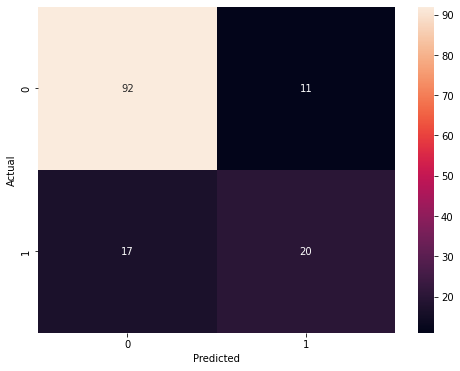

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


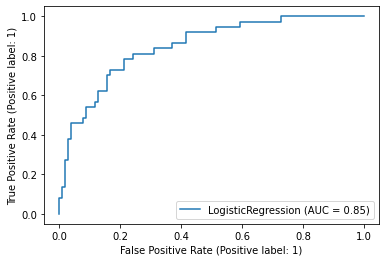

In [20]:
plot_roc_curve(logreg, X_test, y_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


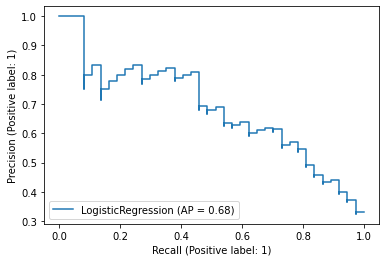

In [21]:
# Precision Recall Curve

plot_precision_recall_curve(logreg, X_test, y_test)

### Hyperparameter Tuning

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [54]:
# hyperparameter 
hyperparam_space = {
    'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
    'max_iter':[100, 200, 300, 400, 500],
    'solver':['newton-cg', 'lbfgs', 'liblinear']
}


# menentukan jumlah fold untuk cross validation
skfold = StratifiedKFold(n_splits=5)

# model/estimator
model = LogisticRegression()

# Grid Search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='f1',
    n_jobs=-1
)

# fitting gridsearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='f1')

In [55]:
# f1 score terbaik 
grid_search.best_score_

0.5516239220815125

In [56]:
# hyperparameter terbaik
grid_search.best_params_

{'C': 10, 'max_iter': 100, 'solver': 'liblinear'}

In [57]:
# lihat hasil gridsearch secara keseluruhan

cv_result = pd.DataFrame(grid_search.cv_results_)

In [58]:
cv_result.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
62,0.051659,0.032388,0.027747,0.014536,10,100,liblinear,"{'C': 10, 'max_iter': 100, 'solver': 'liblinear'}",0.458333,0.553191,0.758621,0.553191,0.434783,0.551624,0.114199,1
65,0.025126,0.018291,0.049332,0.042858,10,200,liblinear,"{'C': 10, 'max_iter': 200, 'solver': 'liblinear'}",0.458333,0.553191,0.758621,0.553191,0.434783,0.551624,0.114199,1
68,0.019609,0.012216,0.022328,0.022907,10,300,liblinear,"{'C': 10, 'max_iter': 300, 'solver': 'liblinear'}",0.458333,0.553191,0.758621,0.553191,0.434783,0.551624,0.114199,1
71,0.035945,0.022385,0.016417,0.006618,10,400,liblinear,"{'C': 10, 'max_iter': 400, 'solver': 'liblinear'}",0.458333,0.553191,0.758621,0.553191,0.434783,0.551624,0.114199,1
74,0.041658,0.032106,0.051860,0.029934,10,500,liblinear,"{'C': 10, 'max_iter': 500, 'solver': 'liblinear'}",0.458333,0.553191,0.758621,0.553191,0.434783,0.551624,0.114199,1


In [59]:
# hyperparameter dari benchmark model

cv_result[(cv_result['param_C']==1) & (cv_result['param_max_iter']==100)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
90,0.212940,0.030144,0.040682,0.030507,1,100,newton-cg,"{'C': 1, 'max_iter': 100, 'solver': 'newton-cg'}",0.458333,0.541667,0.758621,0.553191,0.444444,0.551251,0.112374,6
91,0.159331,0.065727,0.050587,0.024798,1,100,lbfgs,"{'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}",0.458333,0.541667,0.758621,0.553191,0.444444,0.551251,0.112374,6
92,0.053674,0.034692,0.014908,0.001973,1,100,liblinear,"{'C': 1, 'max_iter': 100, 'solver': 'liblinear'}",0.458333,0.553191,0.758621,0.553191,0.425532,0.549774,0.116136,116


In [67]:
# hyperparameter hasil dari hyperparameter tuning

cv_result[(cv_result['param_C']==10) & (cv_result['param_max_iter']==100)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
60,0.146087,0.046969,0.033269,0.024706,10,100,newton-cg,"{'C': 10, 'max_iter': 100, 'solver': 'newton-cg'}",0.458333,0.541667,0.758621,0.553191,0.444444,0.551251,0.112374,6
61,0.124693,0.046205,0.036673,0.033204,10,100,lbfgs,"{'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}",0.458333,0.541667,0.758621,0.553191,0.444444,0.551251,0.112374,6
62,0.051659,0.032388,0.027747,0.014536,10,100,liblinear,"{'C': 10, 'max_iter': 100, 'solver': 'liblinear'}",0.458333,0.553191,0.758621,0.553191,0.434783,0.551624,0.114199,1


- f1 score sebelum dan setelah hyperparameter tuning tidak berubah

### Membandingkan Performa Model pada Test Set (sebelum dan setelah hyperparameter tuning)

**model sebelum hyperparameter tuning**


In [61]:
# model sebelum hyperparameter tuning

logreg = LogisticRegression(C=1, max_iter=100)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred)

0.588235294117647

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       103
           1       0.65      0.54      0.59        37

    accuracy                           0.80       140
   macro avg       0.74      0.72      0.73       140
weighted avg       0.79      0.80      0.79       140



**model sebelum hyperparameter tuning**


In [63]:
# model setelah hyperparameter tuning

logreg = LogisticRegression(C=1000, max_iter=100)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred)

0.588235294117647

In [64]:
# model terbaik (dari hyperparameter tuning)
grid_search.best_estimator_

LogisticRegression(C=10, solver='liblinear')

In [65]:
logreg = grid_search.best_estimator_
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred)

0.588235294117647

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       103
           1       0.65      0.54      0.59        37

    accuracy                           0.80       140
   macro avg       0.74      0.72      0.73       140
weighted avg       0.79      0.80      0.79       140



**Kesimpulan**

- F1 score sebelum dan sesudah hyperparameter tuning tidak improve.
- Penyebabnya bisa jadi karena pemilihan nilai untuk hyperparameter masih kurang tepat

Solusi:
- Atur ulang nilai yang dimasukkan pada param_grid
- Ganti algoritma ML
- Feature engineering
- Tambah hyperparameter

## Randomized Search (Hyperparameter Tuning)

### Load Dataset

In [69]:
df_tip = sns.load_dataset('tips')
df_tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [70]:
df_tip.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [71]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Data Splitting

In [76]:
X = df_tip.drop(columns='tip') 
y = df_tip['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### Preprocessing 

In [83]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

In [84]:
# Column Transformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex','smoker','day','time'])
])

# scaler
scaler = RobustScaler()

### Choose Best Benchmark Model

Mencari model benchmar terbaik

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import KFold

In [86]:
# define benchmark model
linreg = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=10)

In [102]:
# kandidat model
models = [linreg, knn, tree]

cv_mean = []
cv_std = []

# looping mencari model terbaik
for i in models:

    # define fold
    fold = KFold(n_splits=5)

    # Pipeline (berisi tahapan dari preprocesing sampai modeling)
    model_pipe = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # cross validation
    model_cv = cross_val_score(
        model_pipe,
        X_train,
        y_train,
        scoring='neg_root_mean_squared_error'
    )

    print(model_cv, i)

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())


[-1.16802692 -1.16752348 -1.81019772 -1.49471601 -1.37771612] LinearRegression()
[-1.55959087 -1.2793508  -1.96185501 -1.39123642 -1.49234773] KNeighborsRegressor()
[-1.20542658 -1.18523899 -1.88787981 -1.46382493 -1.46174032] DecisionTreeRegressor(random_state=10)


In [105]:
# Membandingkan model terbaik
pd.DataFrame({
    'model': models,
    'RMSE mean': cv_mean,
    'RMSE std': cv_std
})

,model,RMSE mean,RMSE std
0,LinearRegression(),-1.403636,0.238965
1,KNeighborsRegressor(),-1.536876,0.232653
2,DecisionTreeRegressor(random_state=10),-1.440822,0.253599


**Best Benchmark Model**

- Benchmark Model terbaik adalah Linear Regression dengan score RMSE 1.40, dan model cukup stabil
- Kita akan mencoba melakukan hyperparameter tuning terhadap model Decision Tree

### Hyperparameter Tuning

In [119]:
# hyperparameter untuk decision tree
hyperparam_space = {
    'model__max_depth':[2,3,4,5,6,7],                  # 6
    'model__min_samples_leaf':[2,5,10,15,20,50,100],   # 7
    'model__min_samples_split':[2,5,10,15,20,50,100]   # 7 
}                                                      # 252 kombinasi hyperparameter


# Pipeline (berisi tahapan dari preprocesing sampai modeling)
model_pipe = Pipeline([
    ('transformer', transformer),
    ('scaler', scaler),
    ('model', tree)
])

# Randomize Search
random_search = RandomizedSearchCV(
    estimator=model_pipe,                   # model yang akan dituning
    param_distributions=hyperparam_space,   # hyperparameter yang akan dicoba
    cv=5,                                   # jumlah fold untuk cross validation
    n_iter=20,                              # jumlah kombinasi yang akan dihasilkan
    random_state=10,                        
    n_jobs=-1,                               # memakai semua processor di komputer
    scoring='neg_root_mean_squared_error'
)

# fitting randomized serch
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['sex',
                                                                                'smoker',
                                                                                'day',
                                                                                'time'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              DecisionTreeRegressor(random_state=10))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__max_depth': [2, 3, 4, 5, 6, 7],
                      

In [120]:
# RMSE pada model terbaik
random_search.best_score_

-1.3816127471307202

In [121]:
# Hyperparameter pada model terbaik
random_search.best_params_

{'model__min_samples_split': 10,
 'model__min_samples_leaf': 50,
 'model__max_depth': 5}

In [122]:
# Model terbaik
random_search.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])])),
                ('scaler', RobustScaler()),
                ('model',
                 DecisionTreeRegressor(max_depth=5, min_samples_leaf=50,
                                       min_samples_split=10,
                                       random_state=10))])

In [123]:
# 5 model dengan RMSE terbaik
pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.059373,0.033233,0.067821,0.030206,10,50,5,"{'model__min_samples_split': 10, 'model__min_s...",-1.170625,-1.150190,-1.803137,-1.464604,-1.319508,-1.381613,0.239374,1
17,0.064472,0.034638,0.063456,0.024591,5,50,6,"{'model__min_samples_split': 5, 'model__min_sa...",-1.170625,-1.150190,-1.803137,-1.464604,-1.319508,-1.381613,0.239374,1
0,0.067069,0.013231,0.034549,0.023473,2,100,7,"{'model__min_samples_split': 2, 'model__min_sa...",-1.179194,-1.180247,-1.753039,-1.488741,-1.310297,-1.382304,0.217274,3
6,0.067543,0.027118,0.036306,0.019654,100,5,4,"{'model__min_samples_split': 100, 'model__min_...",-1.196238,-1.151279,-1.805236,-1.470605,-1.381140,-1.400900,0.233638,4
13,0.088687,0.034730,0.049369,0.024352,100,10,5,"{'model__min_samples_split': 100, 'model__min_...",-1.196238,-1.151279,-1.805236,-1.470605,-1.381140,-1.400900,0.233638,4


### Predict Test Set

Membandingkan performa model decision tree sebelum tuning dan setelah tuning (pada test set)

In [124]:
from sklearn.metrics import mean_squared_error

**Model Linear Regression Before Hyperparameter Tuning (Benchmark)**

In [134]:
# benchmark model (sebelum tuning)

linreg = LinearRegression()

linreg_pipe = Pipeline([
    ('transformer', transformer),
    ('scaler', scaler),
    ('model', linreg)
])

linreg_pipe.fit(X_train, y_train)

y_pred = linreg_pipe.predict(X_test)
mean_squared_error(y_test, y_pred)

1.7571030525536535

**Model Before Hyperparameter Tuning (Benchmark)**

In [126]:
# benchmark model (sebelum tuning)

model_before = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2)

model_before_pipe = Pipeline([
    ('transformer', transformer),
    ('scaler', scaler),
    ('model', model_before)
])

model_before_pipe.fit(X_train, y_train)

y_pred = model_before_pipe.predict(X_test)
mean_squared_error(y_test, y_pred)

1.8428674489869041

**Model After Hyperparameter Tuning**

In [133]:
random_search.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])])),
                ('scaler', RobustScaler()),
                ('model',
                 DecisionTreeRegressor(max_depth=5, min_samples_leaf=50,
                                       min_samples_split=10,
                                       random_state=10))])

In [129]:
# model setelah tuning

model_after = random_search.best_estimator_

model_after.fit(X_train, y_train)

y_pred = model_after.predict(X_test)
mean_squared_error(y_test, y_pred)

1.7111567904909382

In [131]:
random_search.best_params_

{'model__min_samples_split': 10,
 'model__min_samples_leaf': 50,
 'model__max_depth': 5}

In [132]:
# benchmark model (sebelum tuning)

model_after = DecisionTreeRegressor(max_depth=5, min_samples_leaf=50, min_samples_split=10)

model_after_pipe = Pipeline([
    ('transformer', transformer),
    ('scaler', scaler),
    ('model', model_after)
])

model_after_pipe.fit(X_train, y_train)

y_pred = model_after_pipe.predict(X_test)
mean_squared_error(y_test, y_pred)

1.7111567904909382

**Kesimpulan**

- Kita melakukan hyperparameter tuning dengan RandomizedSearch karena kombinasi hyperparameter sangat banyak
- Kita hanya memilih 20 kombinasi hyperparameter secara random (n_iter) untuk dilakukan cross validation
- Hyperparameter tuning berhasil meningkatkan performa Model Decision Tree dari RMSE 1.84 menjadi 1.71 dollar